In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install cellphonedb

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.3 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.w

In [ ]:
import pandas as pd
import glob
import os
import numpy as np

In [ ]:
gdrivePath = "gdrive" + os.sep +"My Drive"+ os.sep +"Sevgi Phd"+ os.sep +"conference(second_tik)"

In [ ]:
from IPython.display import HTML, display
from cellphonedb.utils import db_releases_utils

display(HTML(db_releases_utils.get_remote_database_versions_html()['db_releases_html_table']))

In [ ]:
# -- Version of the databse
cpdb_version = 'v5.0.0'

# -- Path where the input files to generate the database are located
cpdb_target_dir = os.path.join(gdrivePath+os.sep+'cellphonedb'+os.sep+'data', cpdb_version)

In [ ]:
meta_file_path =gdrivePath+os.sep+"cellphonedb"+os.sep+"data"+os.sep+"metadata.tsv"
counts_file_path = gdrivePath +os.sep+"cellphonedb"+os.sep+"data"+os.sep+'adata.h5ad'
out_path = gdrivePath +os.sep+'results/Cellphonedb/'
cpdb_file_path = gdrivePath+os.sep+'cellphonedb'+os.sep+'data'+os.sep+cpdb_version+os.sep+'cellphonedb.zip'

In [ ]:
cpdb_file_path = gdrivePath+os.sep+'cellphonedb'+os.sep+'data'+os.sep+cpdb_version+os.sep+'cellphonedb.zip'
meta_file_path = gdrivePath +os.sep+"data"+os.sep+"donor_celltype_dataset.csv"
counts_file_path = gdrivePath +os.sep+"data"+os.sep+"merged_sce_limma_hvg_geneSymbol.csv"
#microenvs_file_path = 'data/microenvironment.tsv'
out_path = gdrivePath +os.sep+'results/Cellphonedb/'

In [ ]:
count_dataframe = pd.read_csv(counts_file_path, index_col=0)
count_dataframe

,GCG,INS,TTR,IAPP,SST,REG1A,CHGB,CTRB2,CTRB1,CELA3A,...,TRPC3,ASZ1,ADAM6,EQTN,NR2E3,STYK1,SNX31,GNGT1,PATE2,SNHG11
Sample_1,6.603206,13.075270,8.991617,7.369300,0.000000,1.029420,2.676464,1.531342,0.000000,0.000000,...,0.0,0.0,0.0,0.0,4.072819,0.0,0.0,0.0,0.0,0.000000
Sample_2,6.085725,14.718246,10.697087,9.861125,3.954868,5.278883,7.297775,1.717777,1.116535,2.457527,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Sample_3,7.823692,14.312258,10.513516,10.888791,0.000000,1.341329,6.678192,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Sample_4,7.210233,14.136795,10.635744,10.397793,0.587586,0.478444,7.257737,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Sample_5,6.787684,13.326101,10.219978,12.171442,3.868878,0.000000,4.137385,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D30-8_90,12.595421,2.582874,11.229172,0.000000,8.470292,3.459727,8.836949,2.582874,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
D30-8_91,7.388841,2.679000,6.485846,2.200271,8.616302,4.743232,3.959306,1.482489,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
D30-8_92,12.330381,2.080834,12.330381,3.423542,9.014117,2.080834,10.563005,2.080834,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
D30-8_93,7.783766,1.617055,6.790298,1.617055,8.055532,3.967652,2.362635,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [ ]:
metadata = pd.read_csv(meta_file_path,index_col=0)
metadata

,donor.id,batch,label
1,Non T2D 1,xin,beta
2,Non T2D 1,xin,beta
3,Non T2D 1,xin,beta
4,Non T2D 1,xin,beta
5,Non T2D 1,xin,beta
...,...,...,...
14168,D30,muraro,alpha
14169,D30,muraro,mesenchymal
14170,D30,muraro,alpha
14171,ductal,ductal,ductal


In [ ]:
metadata = pd.read_csv(meta_file_path,index_col=0)
metadata.rename(columns = {'label':'cell_type'}, inplace = True)
metadata = metadata.drop('donor.id', axis=1)
metadata = metadata.drop('batch', axis=1)
metadata.index = count_dataframe.index
metadata

,cell_type
Sample_1,beta
Sample_2,beta
Sample_3,beta
Sample_4,beta
Sample_5,beta
...,...
D30-8_90,alpha
D30-8_91,mesenchymal
D30-8_92,alpha
D30-8_93,ductal


In [ ]:
import anndata
adata = anndata.AnnData(count_dataframe)
adata

AnnData object with n_obs × n_vars = 14172 × 7514

In [ ]:
adata.obs = metadata
adata.obs

,cell_type
Sample_1,beta
Sample_2,beta
Sample_3,beta
Sample_4,beta
Sample_5,beta
...,...
D30-8_90,alpha
D30-8_91,mesenchymal
D30-8_92,alpha
D30-8_93,ductal


In [ ]:
vars = pd.DataFrame()
vars["gene_ids"] = count_dataframe.columns
vars.index = count_dataframe.columns
vars["feature_types"] = "Gene Expression"
vars

,gene_ids,feature_types
GCG,GCG,Gene Expression
INS,INS,Gene Expression
TTR,TTR,Gene Expression
IAPP,IAPP,Gene Expression
SST,SST,Gene Expression
...,...,...
STYK1,STYK1,Gene Expression
SNX31,SNX31,Gene Expression
GNGT1,GNGT1,Gene Expression
PATE2,PATE2,Gene Expression


In [ ]:
adata.var = vars

In [ ]:
adata.write(gdrivePath +os.sep+"cellphonedb"+os.sep+"data"+os.sep+'adata.h5ad')

In [ ]:
metadata.to_csv(gdrivePath+os.sep+"cellphonedb"+os.sep+"data"+os.sep+"metadata.tsv", sep = '\t')

---------------

In [ ]:
meta_file_path =gdrivePath+os.sep+"cellphonedb"+os.sep+"data"+os.sep+"metadata.tsv"

In [ ]:
counts_file_path = gdrivePath +os.sep+"cellphonedb"+os.sep+"data"+os.sep+'adata.h5ad'

In [ ]:
cpdb_file_path

'gdrive/My Drive/Sevgi Phd/conference(second_tik)/cellphonedb/data/v5.0.0/cellphonedb.zip'

In [ ]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellphoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix - a path to the counts file, or an in-memory AnnData object
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    #active_tfs_file_path = active_tf_path,           # optional: defines cell types and their active TFs.
    #microenvs_file_path = microenvs_file_path,       # optional (default: None): defines cells per microenvironment.
    score_interactions = True,                       # optional: whether to score interactions or not.
    iterations = 100,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 8,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

In [ ]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellphoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix - a path to the counts file, or an in-memory AnnData object
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    output_path = out_path,                          # Path to save results.
    )

Reading user files...
The following user files were loaded successfully:
gdrive/My Drive/Sevgi Phd/conference(second_tik)/cellphonedb/data/adata.h5ad
gdrive/My Drive/Sevgi Phd/conference(second_tik)/cellphonedb/data/metadata.tsv
[ ][CORE][28/10/24-20:55:48][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][28/10/24-20:55:53][INFO] Running Real Analysis
[ ][CORE][28/10/24-20:55:53][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [09:05<00:00,  1.83it/s]

[ ][CORE][28/10/24-21:04:59][INFO] Building Pvalues result


[ ][CORE][28/10/24-21:04:59][INFO] Building results
Saved deconvoluted to gdrive/My Drive/Sevgi Phd/conference(second_tik)/results/Cellphonedb/statistical_analysis_deconvoluted_10_28_2024_210459.txt
Saved deconvoluted_percents to gdrive/My Drive/Sevgi Phd/conference(second_tik)/results/Cellphonedb/statistical_analysis_deconvoluted_percents_10_28_2024_210459.txt
Saved means to gdrive/My Drive/Sevgi Phd/conference(second_tik)/results/Cellphonedb/statistical_analysis_means_10_28_2024_210459.txt
Saved pvalues to gdrive/My Drive/Sevgi Phd/conference(second_tik)/results/Cellphonedb/statistical_analysis_pvalues_10_28_2024_210459.txt
Saved significant_means to gdrive/My Drive/Sevgi Phd/conference(second_tik)/results/Cellphonedb/statistical_analysis_significant_means_10_28_2024_210459.txt


In [ ]:
import os
import anndata as ad
import pandas as pd
import ktplotspy as kpy
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
means = pd.read_csv(out_path+os.sep+"/statistical_analysis_means_10_28_2024_210459.txt", sep="\t")
significant_means = pd.read_csv(out_path+os.sep+"/statistical_analysis_significant_means_10_28_2024_210459.txt", sep="\t")
pvals = pd.read_csv(out_path+os.sep+"/statistical_analysis_pvalues_10_28_2024_210459.txt", sep="\t")
decon = pd.read_csv(out_path+os.sep+"/statistical_analysis_deconvoluted_10_28_2024_210459.txt", sep="\t")

In [ ]:
plt = kpy.plot_cpdb_heatmap(pvals = cpdb_results['pvalues'],
                      degs_analysis = False,
                      figsize = (8, 8),
                      title = "Sum of significant interactions")

In [ ]:
plt.savefig(gdrivePath + os.sep + "figures" + os.sep + "cellphonedb"+ os.sep + "heatmap.svg", format='svg')

DotPlot with CellphoneDB with DGE Genes

In [ ]:
means = pd.read_csv(out_path+os.sep+'allGenes'+os.sep+'statistical_analysis_means_10_28_2024_210459.txt', sep="\t")
pvals = pd.read_csv(out_path+os.sep+'allGenes'+os.sep+'statistical_analysis_pvalues_10_28_2024_210459.txt', sep="\t")
deg_file = pd.read_csv(out_path+os.sep+'DEG'+os.sep+'DEGs_mask.txt', sep="\t")

TOP-1 DEGs

In [ ]:
top_1_genes = deg_file.groupby('cluster').head(1)
top_1_genes

,cluster,gene,p_val_adj,p_val,avg_log2FC,pct.1,pct.2
0,PSC,RCN3,1.064231e-74,1.416331e-78,6.698382,0.925,0.065
814,acinar,KLK1,0.000000e+00,0.000000e+00,8.656201,0.936,0.032
2556,activated_stellate,COL6A2,0.000000e+00,0.000000e+00,7.551390,0.982,0.066
3673,alpha,IRX2,0.000000e+00,0.000000e+00,5.597749,0.836,0.061
4903,beta,ADCYAP1,0.000000e+00,0.000000e+00,6.584020,0.801,0.067
5837,delta,RBP4,0.000000e+00,0.000000e+00,4.096546,0.963,0.337
6239,ductal,TACSTD2,0.000000e+00,0.000000e+00,4.234224,0.938,0.161
7794,endothelial,PLVAP,0.000000e+00,0.000000e+00,10.260219,0.931,0.014
8552,epsilon,GHRL,3.763239e-56,5.008303e-60,11.877164,1.000,0.029
8595,gamma,PPY,0.000000e+00,0.000000e+00,4.514449,0.976,0.363


In [ ]:
deg = top_1_genes['gene']
deg = deg.tolist()

In [ ]:
import math

unique_deg = []
[unique_deg.append(x) for x in deg if x not in unique_deg and not (isinstance(x, float) and math.isnan(x))]

len(unique_deg)


15

In [ ]:
p = kpy.plot_cpdb(
    adata=adata,
    cell_type1=".",
    cell_type2=".",  # this means all cell-types
    means=means,
    pvals=pvals,
    celltype_key="cell_type",
    genes=unique_deg,
    figsize=(15, 10),
    title="interacting interactions!",
)


In [ ]:
p.save(gdrivePath + os.sep + "figures" + os.sep + "cellphonedb"+os.sep + "dotPlot.svg", format="svg", width=40, height=10, dpi=900,limitsize=False)

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 40 x 10 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: gdrive/My Drive/Sevgi Phd/conference(second_tik)/figures/cellphonedb/ADM_RAMP3.svg


In [ ]:
p.save(gdrivePath + os.sep + "figures" + os.sep + "cellphonedb"+ os.sep + "dotPlot.pdf", format="pdf", width=40, height=10, dpi=900,limitsize=False)

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 40 x 10 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: gdrive/My Drive/Sevgi Phd/conference(second_tik)/figures/cellphonedb/ADM_RAMP3.pdf


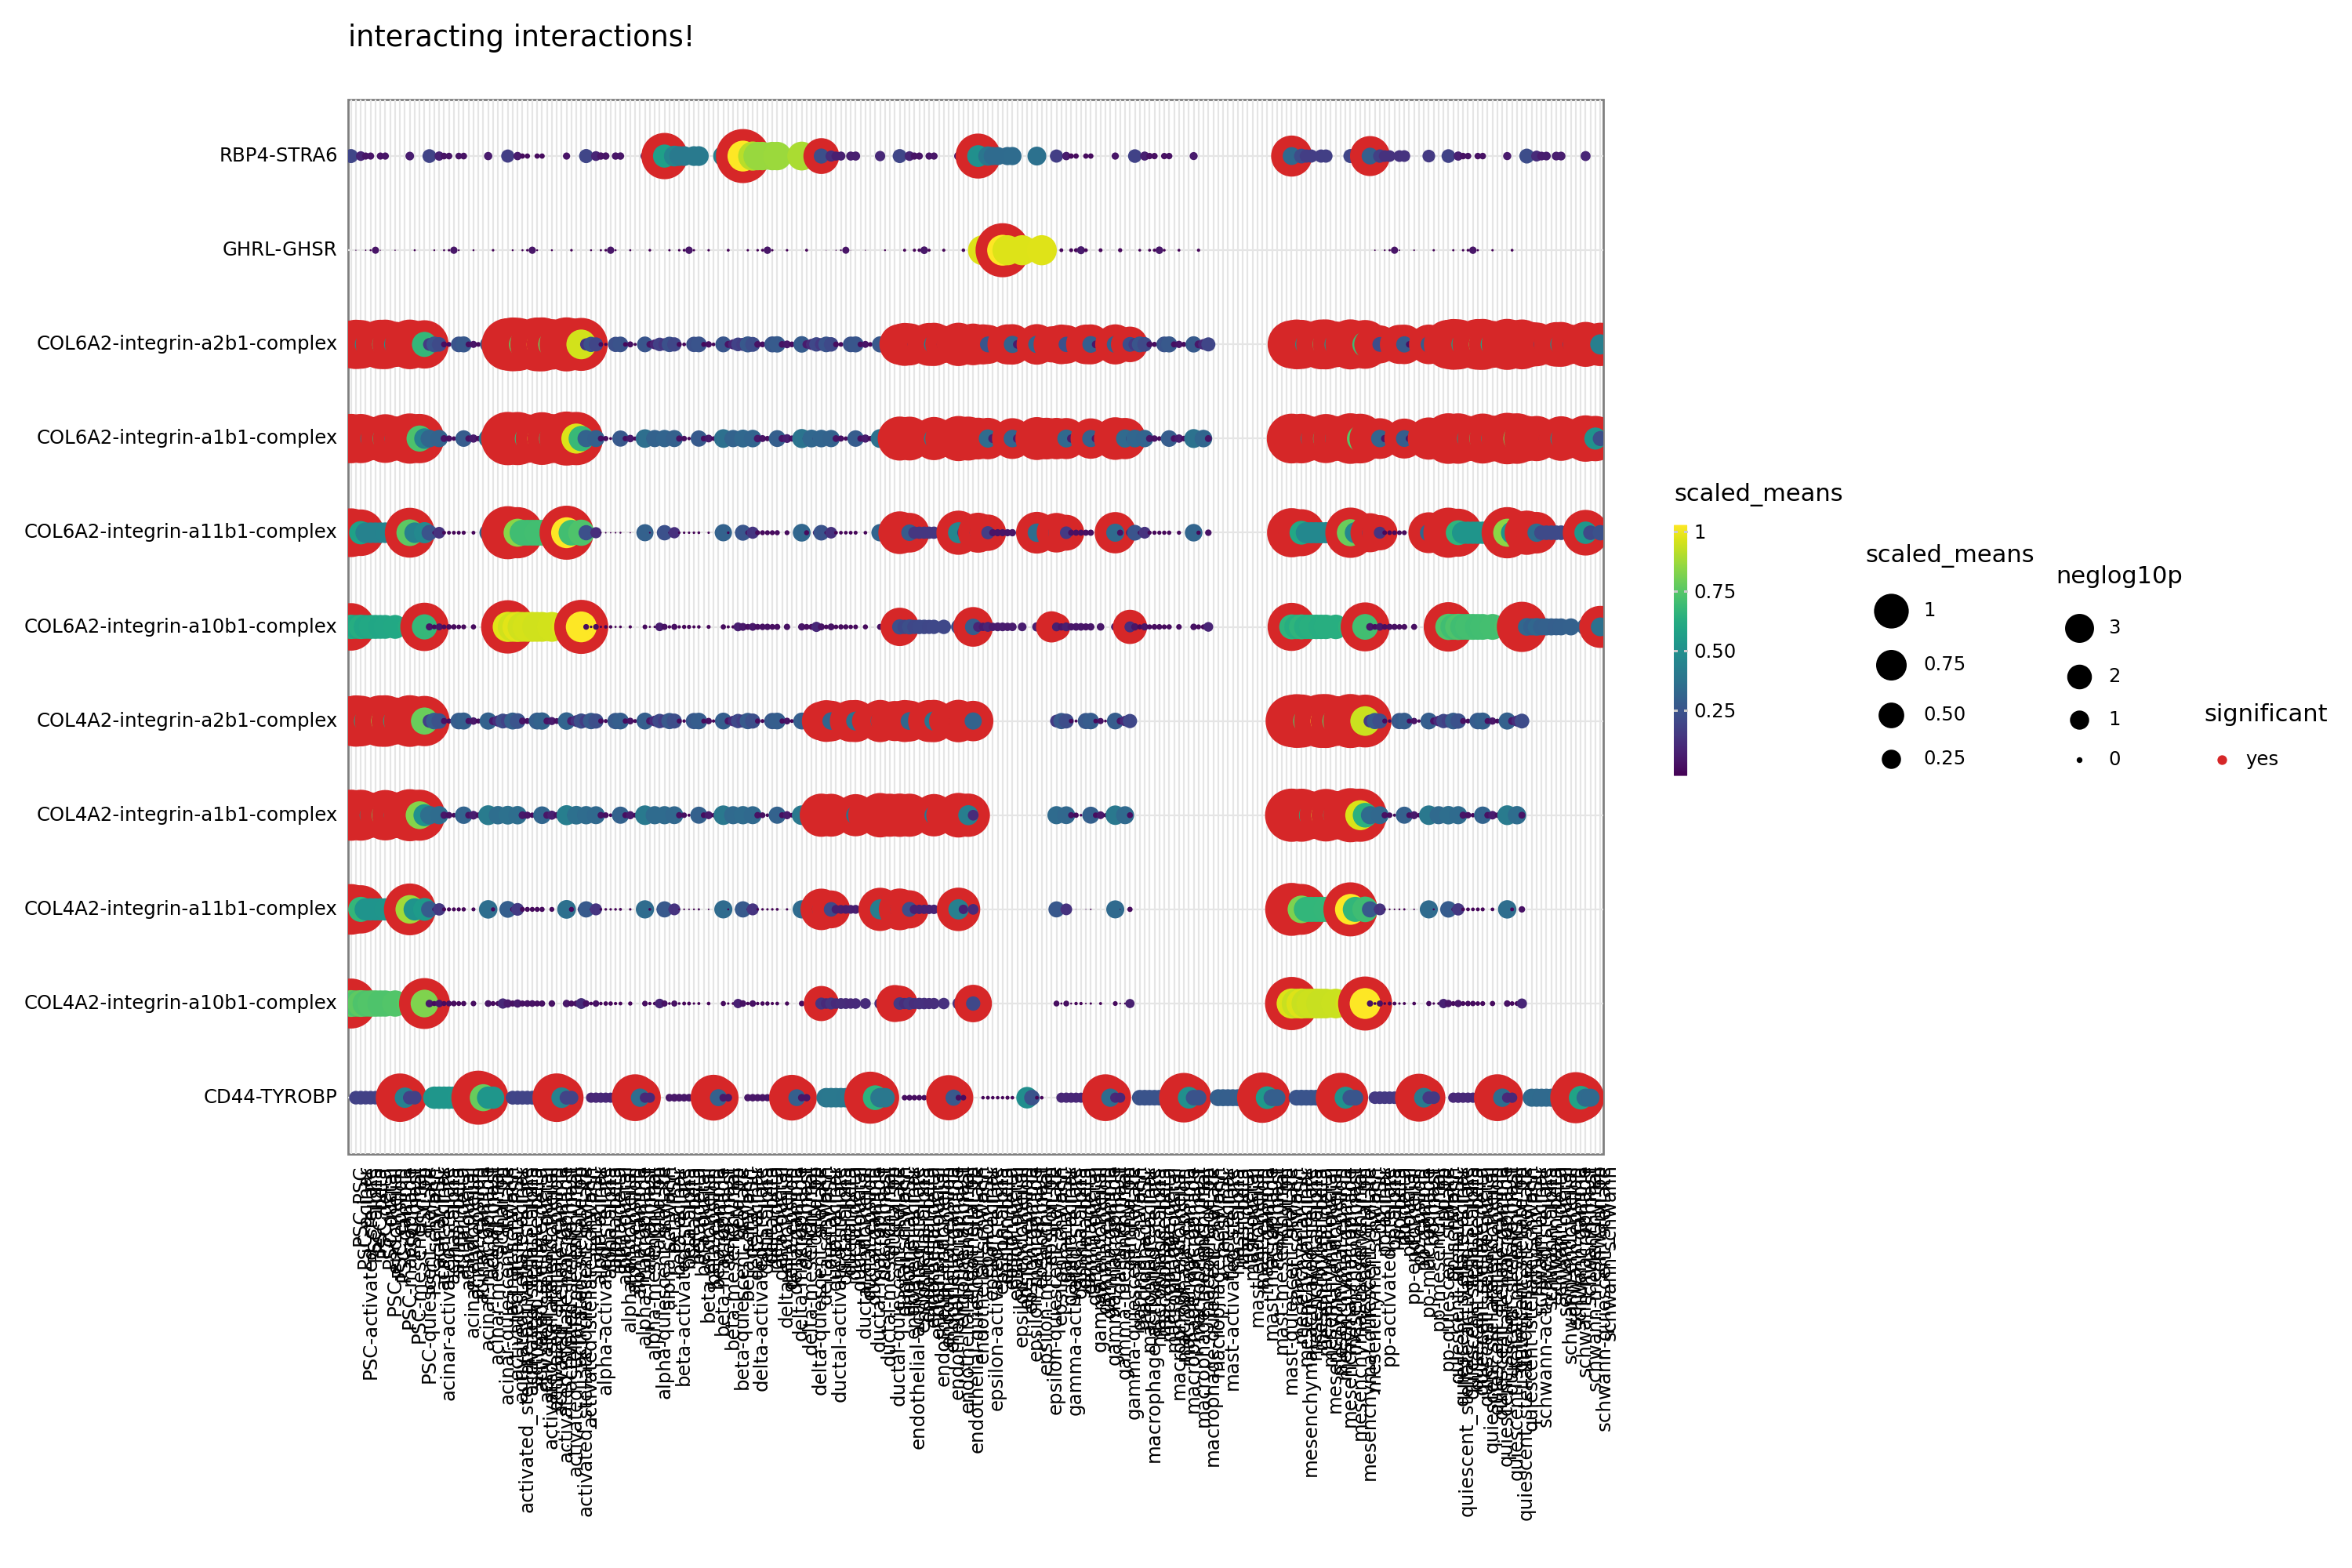

<Figure Size: (1500 x 1000)>

In [ ]:
p

In [ ]:
p.save(gdrivePath + os.sep + "figures" + os.sep + "cellphonedb"+os.sep+"spesificGenes"+os.sep + "RAMP3.svg", format="svg", width=40, height=10, dpi=900,limitsize=False)

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 40 x 10 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: gdrive/My Drive/Sevgi Phd/conference(second_tik)/figures/cellphonedb/spesificGenes/RAMP3.svg


In [ ]:
p.save(gdrivePath + os.sep + "figures" + os.sep + "cellphonedb"+os.sep +"spesificGenes"+os.sep + "RAMP1.pdf", format="pdf", width=40, height=10, dpi=900,limitsize=False)

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 40 x 10 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: gdrive/My Drive/Sevgi Phd/conference(second_tik)/figures/cellphonedb/spesificGenes/RAMP1.pdf
